# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

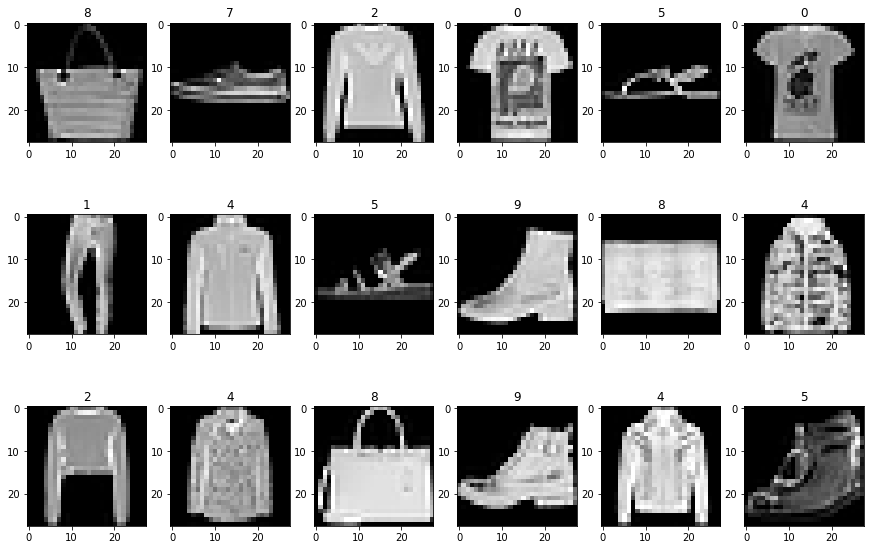

In [5]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [6]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [13]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [14]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4152 - accuracy: 0.8545 - val_loss: 0.3528 - val_accuracy: 0.8713
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 0.2834 - accuracy: 0.8990 - val_loss: 0.3193 - val_accuracy: 0.8869
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.2402 - accuracy: 0.9132 - val_loss: 0.3166 - val_accuracy: 0.8855
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.2074 - accuracy: 0.9249 - val_loss: 0.3206 - val_accuracy: 0.8928
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.1827 - accuracy: 0.9335 - val_loss: 0.3349 - val_accuracy: 0.8876
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 0.1639 - accuracy: 0.9400 - val_loss: 0.3360 - val_accuracy: 0.8915
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1446 - accuracy: 0.9473 - val_loss: 0.3383 - val_accuracy: 0.8957
Epoch 

Train Acc      0.9932166934013367
Validation Acc 0.8726999759674072


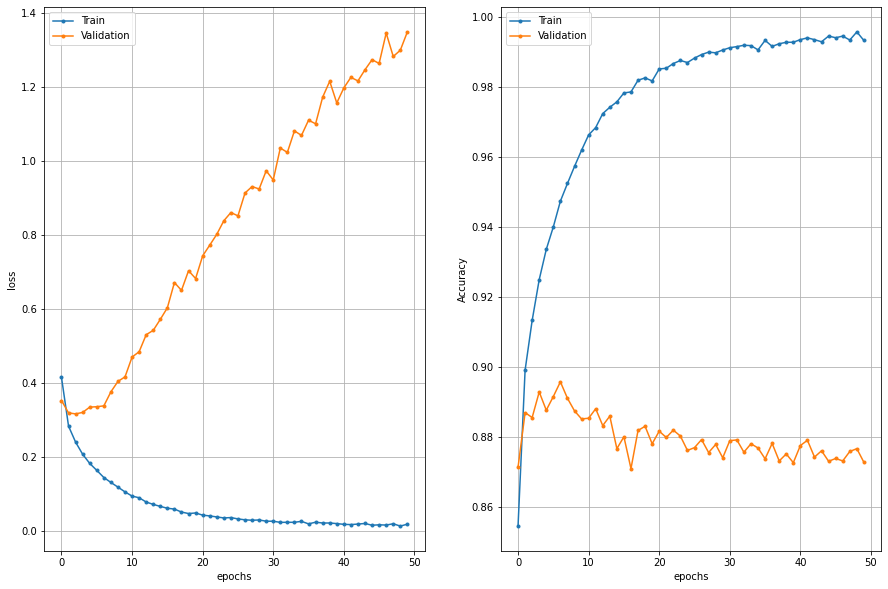

In [15]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [11]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust
# TRY TO REDUSE PARAMETERS FIRST

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         7385

In [12]:
# Train the network
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 11s 11ms/step - loss: 0.4408 - accuracy: 0.8392 - val_loss: 0.3345 - val_accuracy: 0.8793
Epoch 2/50
938/938 [==============================] - 10s 10ms/step - loss: 0.2802 - accuracy: 0.8983 - val_loss: 0.2762 - val_accuracy: 0.8995
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2402 - accuracy: 0.9120 - val_loss: 0.2601 - val_accuracy: 0.9051
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2094 - accuracy: 0.9219 - val_loss: 0.2461 - val_accuracy: 0.9114
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.1878 - accuracy: 0.9313 - val_loss: 0.2450 - val_accuracy: 0.9129
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 0.1682 - accuracy: 0.9384 - val_loss: 0.2436 - val_accuracy: 0.9135
Epoch 7/50
938/938 [==============================] - 9s 9ms/step - loss: 0.1497 - accuracy: 0.9452 - val_loss: 0.2473 - val_accuracy: 0.917

Train Acc      0.9926000237464905
Validation Acc 0.9139999747276306


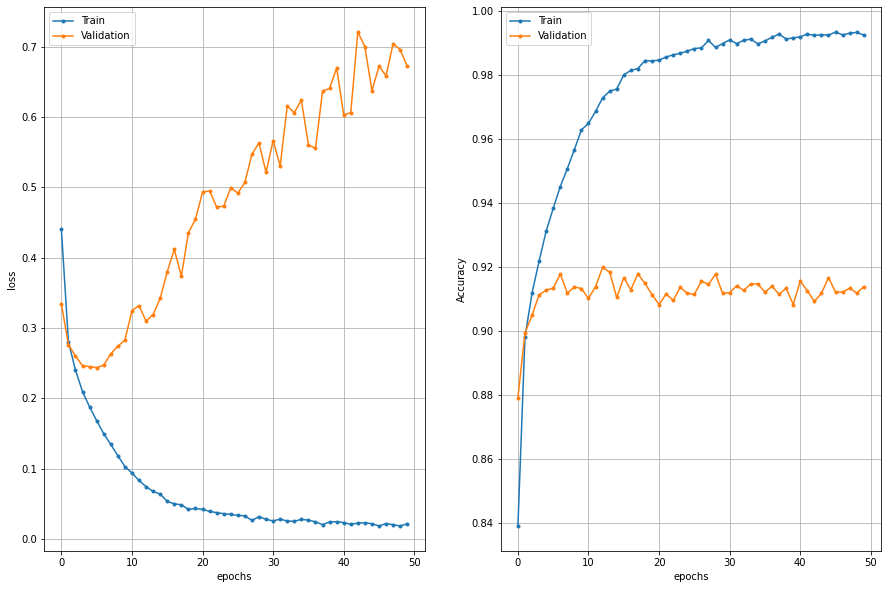

In [13]:
# Show the results

plot_history(history)

TRY TO APPLY Dropout 20%

In [14]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(128)(net)
net = Dropout(0.2)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                       

In [15]:
# Train the network

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 13s 13ms/step - loss: 0.5263 - accuracy: 0.8086 - val_loss: 0.3563 - val_accuracy: 0.8703
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3406 - accuracy: 0.8756 - val_loss: 0.2953 - val_accuracy: 0.8896
Epoch 3/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2986 - accuracy: 0.8916 - val_loss: 0.2839 - val_accuracy: 0.8964
Epoch 4/50
938/938 [==============================] - 10s 11ms/step - loss: 0.2741 - accuracy: 0.8993 - val_loss: 0.2539 - val_accuracy: 0.9084
Epoch 5/50
938/938 [==============================] - 10s 11ms/step - loss: 0.2562 - accuracy: 0.9069 - val_loss: 0.2533 - val_accuracy: 0.9087
Epoch 6/50
938/938 [==============================] - 10s 11ms/step - loss: 0.2431 - accuracy: 0.9102 - val_loss: 0.2398 - val_accuracy: 0.9124
Epoch 7/50
938/938 [==============================] - 10s 10ms/step - loss: 0.2336 - accuracy: 0.9139 - val_loss: 0.2352 - val_accuracy:

Train Acc      0.9466833472251892
Validation Acc 0.9259999990463257


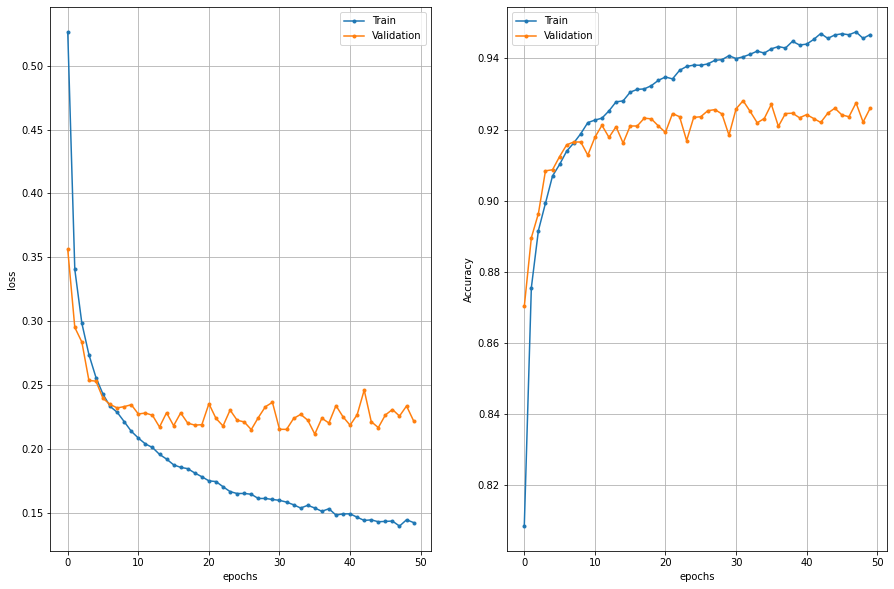

In [16]:
# Show the results

plot_history(history)

The DROPOUT work wery vell. The Accuracy more than 0.92 now. 


Try to add Data Augmentation


In [1]:
#Try to rotation for 15 degrees

from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])                                
                    
            yield x_, y_

In [7]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(128)(net)
net = Dropout(0.2)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                         

In [9]:
epochs = 50
batch_size = 64
steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)
print(x_train.shape)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))
print('Elapsed time', time() - start)

(60000, 28, 28)
Epoch 1/50
937/937 [==============================] - 17s 6ms/step - loss: 0.5585 - accuracy: 0.7969 - val_loss: 0.4008 - val_accuracy: 0.8517
Epoch 2/50
937/937 [==============================] - 5s 5ms/step - loss: 0.3639 - accuracy: 0.8669 - val_loss: 0.3203 - val_accuracy: 0.8875
Epoch 3/50
937/937 [==============================] - 5s 6ms/step - loss: 0.3240 - accuracy: 0.8817 - val_loss: 0.2883 - val_accuracy: 0.8940
Epoch 4/50
937/937 [==============================] - 5s 5ms/step - loss: 0.2988 - accuracy: 0.8909 - val_loss: 0.2947 - val_accuracy: 0.8910
Epoch 5/50
937/937 [==============================] - 5s 5ms/step - loss: 0.2830 - accuracy: 0.8958 - val_loss: 0.2801 - val_accuracy: 0.8994
Epoch 6/50
937/937 [==============================] - 5s 5ms/step - loss: 0.2697 - accuracy: 0.9013 - val_loss: 0.2674 - val_accuracy: 0.9022
Epoch 7/50
937/937 [==============================] - 5s 5ms/step - loss: 0.2598 - accuracy: 0.9055 - val_loss: 0.2456 - val_accura

Train Acc      0.9353154897689819
Validation Acc 0.9236999750137329


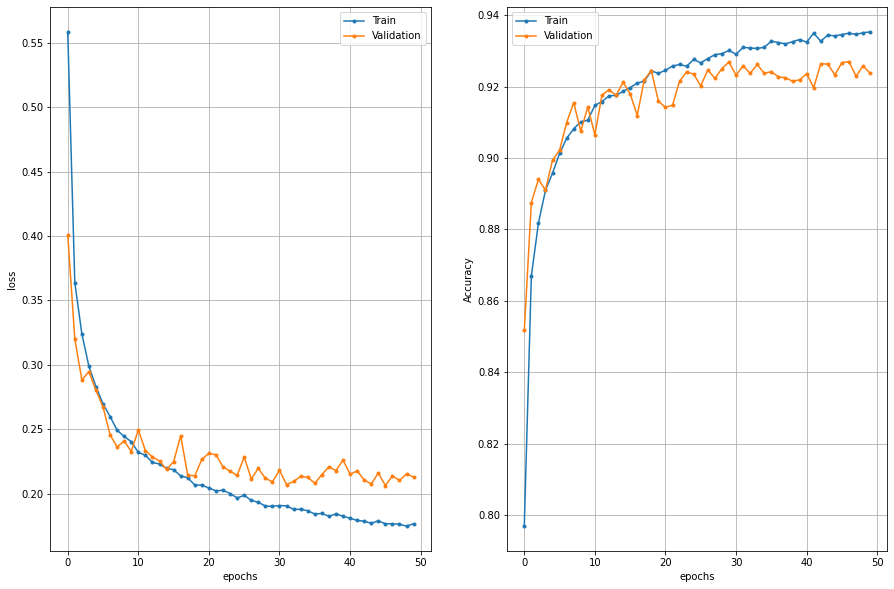

In [12]:
# Show the results

plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

### Answers

1. First I Reduced the number of parameters of the model. Accuracy was increased about 91%. Second I applied the Dropout 20%. Accuracy was increased more about 92%. Last I add Augmentation of data, the accuracy is same as in previous step 92%.

2. In this case the Flip Augmentation do not effective, as I think because this kind of data is very specific and vertically oriented. Probably the best result will be with Rotation Augmentation.